In [7]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
TimeML_gold_data = pd.read_csv('TimeML_few_shot_gold_equal_length_without_commas_fullstops.csv')
TimeML_gold_data.head(10)

,Unnamed: 0,id,token,gold_label
0,0,140408151629568,A,<O>
1,1,140408151559552,Cyprus,<O>
2,2,140408148963008,exit,<EVENT>
3,3,140408148952000,from,<O>
4,4,140408148963648,the,<O>
5,5,140408150037376,euro,<O>
6,6,140408149589504,union,<O>
7,7,140408152268032,if,<O>
8,8,140408149577152,it,<O>
9,9,140408148951680,comes,<EVENT>


In [9]:
gold_tokens = TimeML_gold_data['token']
gold_labels = TimeML_gold_data['gold_label']

In [10]:
TimeML_predicted_data = pd.read_csv('TimeML_few_shot_predicted_equal_length_without_commas_fullstops.csv')
TimeML_predicted_data.head(10)

,Unnamed: 0,id,token,predicted_label
0,0,140408151629568,A,<O>
1,1,140408151559552,Cyprus,<O>
2,2,140408148963008,exit,<EVENT>
3,3,140408148952000,from,<O>
4,4,140408148963648,the,<O>
5,5,140408150037376,euro,<O>
6,6,140408149589504,union,<O>
7,7,140408152268032,if,<O>
8,8,140408149577152,it,<O>
9,9,140408148951680,comes,<O>


In [11]:
predicted_tokens = TimeML_predicted_data['token']
predicted_labels = TimeML_predicted_data['predicted_label']

In [12]:
predicted_labels

0           <O>
1           <O>
2       <EVENT>
3           <O>
4           <O>
         ...   
6404        <O>
6405        <O>
6406        <O>
6407        <O>
6408        <O>
Name: predicted_label, Length: 6409, dtype: object

In [13]:
gold_labels.value_counts()

<O>        5663
<EVENT>     746
Name: gold_label, dtype: int64

In [14]:
predicted_labels.value_counts()

<O>        5847
<EVENT>     562
Name: predicted_label, dtype: int64

In [15]:
# comparing the LLM's predicted labels to the gold standard
print(classification_report(gold_labels, predicted_labels))

              precision    recall  f1-score   support

     <EVENT>       0.76      0.57      0.65       746
         <O>       0.95      0.98      0.96      5663

    accuracy                           0.93      6409
   macro avg       0.85      0.78      0.81      6409
weighted avg       0.92      0.93      0.93      6409



In [10]:
x = classification_report(gold_labels, predicted_labels)
with open('eval.txt', 'w', encoding = 'utf8') as outfile:
    outfile.write(x)

In [11]:
with open('eval.txt', encoding = 'utf8') as infile:
    text = infile.read()

In [12]:
print(text)

              precision    recall  f1-score   support

     <EVENT>       0.76      0.57      0.65       746
         <O>       0.95      0.98      0.96      5663

    accuracy                           0.93      6409
   macro avg       0.85      0.78      0.81      6409
weighted avg       0.92      0.93      0.93      6409



In [16]:
confusion_matrix(gold_labels, predicted_labels)

array([[ 428,  318],
       [ 134, 5529]], dtype=int64)

In [17]:
data_labels = unique_labels(gold_labels)
print(data_labels)

['<EVENT>' '<O>']


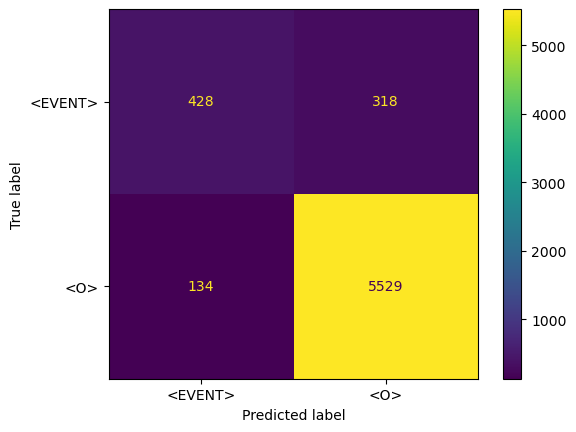

In [18]:
cm = confusion_matrix(gold_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_labels)
disp.plot();

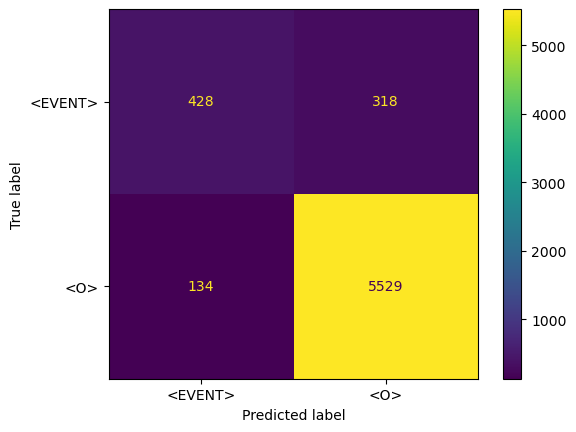

In [19]:
disp.plot().figure_.savefig('confusion_matrix.png')